In [1]:
%load_ext autoreload

In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..")
MODULE_PATH = os.path.join(BASE_PATH, "modules")
DATASET_PATH = os.path.join(BASE_PATH, "datasets")

In [4]:
sys.path.append(MODULE_PATH)

In [5]:
from data import BenchmarkData, DataSetType
from bayesian import McDropout
from models import ygal_cnn, fchollet_cnn, setup_growth
from active_learning import AcquisitionFunction

In [6]:
mnist_path = os.path.join(DATASET_PATH, "mnist")
num_classes = 10
mnist = BenchmarkData(DataSetType.MNIST, mnist_path, dtype=float, classes=num_classes)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(mnist.inputs, mnist.targets)

In [8]:
setup_growth()

1 Physical GPU's,  1 Logical GPU's


In [45]:
from tensorflow.keras.optimizers import SGD

model = McDropout(fchollet_cnn(output=num_classes))
optimizer = SGD(lr=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)
model.fit(x_train[:300], y_train[:300], epochs=300, batch_size=20)

Epoch 1/300
15/15 [==============================] - 0s 6ms/step - loss: 67.4211
Epoch 2/300
15/15 [==============================] - 0s 5ms/step - loss: 2.2646
Epoch 3/300
15/15 [==============================] - 0s 5ms/step - loss: 2.0835
Epoch 4/300
15/15 [==============================] - 0s 5ms/step - loss: 1.6231
Epoch 5/300
15/15 [==============================] - 0s 5ms/step - loss: 1.3078
Epoch 6/300
15/15 [==============================] - 0s 5ms/step - loss: 1.1017
Epoch 7/300
15/15 [==============================] - 0s 5ms/step - loss: 0.9690
Epoch 8/300
15/15 [==============================] - 0s 5ms/step - loss: 0.7292
Epoch 9/300
15/15 [==============================] - 0s 5ms/step - loss: 0.7626
Epoch 10/300
15/15 [==============================] - 0s 5ms/step - loss: 0.6111
Epoch 11/300
15/15 [==============================] - 0s 5ms/step - loss: 0.5561
Epoch 12/300
15/15 [==============================] - 0s 5ms/step - loss: 0.5258
Epoch 13/300
15/15 [================

15/15 [==============================] - 0s 3ms/step - loss: 0.0500
Epoch 103/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0294
Epoch 104/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0551
Epoch 105/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0557
Epoch 106/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0349
Epoch 107/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0551
Epoch 108/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0209
Epoch 109/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0552
Epoch 110/300
15/15 [==============================] - 0s 2ms/step - loss: 0.1213
Epoch 111/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0484
Epoch 112/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0279
Epoch 113/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0412
Epoch 114/300
15/15 [=========

15/15 [==============================] - 0s 3ms/step - loss: 0.0386
Epoch 203/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 204/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 205/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0452
Epoch 206/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0386
Epoch 207/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 208/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0228
Epoch 209/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0418
Epoch 210/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0402
Epoch 211/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0300
Epoch 212/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 213/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 214/300
15/15 [=========

In [46]:
model.evaluate(x_test, y_test, sample_size=1, batch_size=900)

{'loss': 1.7710681, 'accuracy': 0.776}

In [48]:
model.evaluate(x_test, y_test, sample_size=100, batch_size=900)

{'loss': 0.5859913, 'accuracy': 0.779332}

In [98]:
result = model(x_test[:10], sample_size=100)

In [196]:
o_model = fchollet_cnn(output=num_classes)
o_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
o_model.fit(x_test[:10], y_test[:10], epochs=5, batch_size=10)

Epoch 1/5
1/1 [==============================] - 0s 951us/step - loss: 51.6130 - accuracy: 0.1000
Epoch 2/5
1/1 [==============================] - 0s 652us/step - loss: 52.5133 - accuracy: 0.2000
Epoch 3/5
1/1 [==============================] - 0s 1ms/step - loss: 23.5123 - accuracy: 0.2000
Epoch 4/5
1/1 [==============================] - 0s 854us/step - loss: 42.2076 - accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 999us/step - loss: 13.8342 - accuracy: 0.6000


In [197]:
def predict(data, model, num_predictions):
    
    predictions = []
    
    for n in range(num_predictions):
        output = model(data, training=True)
        predictions.append(output)
        
    return np.stack(predictions, axis=1)

In [314]:
num_samples = 100
outputs = predict(x_test[10:20], o_model, num_samples)

In [315]:
classes = list(range(num_classes))*num_samples

<AxesSubplot:xlabel='labels', ylabel='prediction'>

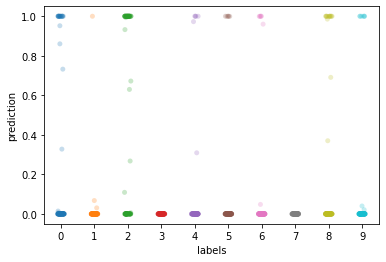

In [319]:
df = pd.DataFrame({
    "prediction": outputs[1].flatten(),
    "labels": classes
})
sns.stripplot(data=df, y="prediction", x="labels", alpha=.25)

In [323]:
pred = np.argmax(np.mean(outputs, axis=1), axis=1)
pred

array([2, 2, 0, 2, 2, 2, 8, 2, 2, 6])

In [324]:
y_test[10:20]

array([1, 5, 5, 9, 3, 2, 1, 2, 2, 6], dtype=uint8)

In [325]:
np.mean(pred == y_test[10:20])

0.4

In [332]:
o_model.fit(x_test[:10], y_test[:10], epochs=50, batch_size=10)

Epoch 1/50
1/1 [==============================] - 0s 1ms/step - loss: 26.1159 - accuracy: 0.4000
Epoch 2/50
1/1 [==============================] - 0s 1ms/step - loss: 21.5079 - accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 1ms/step - loss: 30.7761 - accuracy: 0.6000
Epoch 4/50
1/1 [==============================] - 0s 1ms/step - loss: 10.0781 - accuracy: 0.7000
Epoch 5/50
1/1 [==============================] - 0s 1ms/step - loss: 3.5514 - accuracy: 0.8000
Epoch 6/50
1/1 [==============================] - 0s 1ms/step - loss: 4.4494 - accuracy: 0.8000
Epoch 7/50
1/1 [==============================] - 0s 1ms/step - loss: 0.6508 - accuracy: 0.9000
Epoch 8/50
1/1 [==============================] - 0s 916us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 9/50
1/1 [==============================] - 0s 977us/step - loss: 0.0569 - accuracy: 1.0000
Epoch 10/50
1/1 [==============================] - 0s 1ms/step - loss: 2.0016 - accuracy: 0.9000
Epoch 11/50
1/1 [==============

<AxesSubplot:xlabel='labels', ylabel='prediction'>

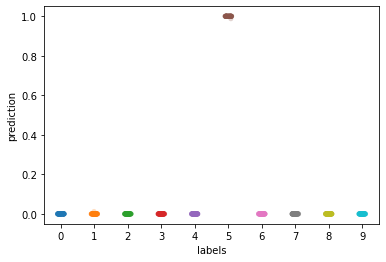

In [356]:
outputs = predict(x_test[10:20], o_model, num_samples)
classes = list(range(num_classes))*num_samples
df = pd.DataFrame({
    "prediction": outputs[1].flatten(),
    "labels": classes
})
sns.stripplot(data=df, y="prediction", x="labels", alpha=.25)

In [353]:
classes = list(range(num_classes))
df = pd.DataFrame({
    "prediction": np.mean(outputs, axis=1)[0],
    "labels": classes
})
